In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_drugs = pd.read_csv('multiple_example_negative_sample.csv')
df_drugs.head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2
0,Drug 1,100000.0,-14.0,-11.0
1,Drug 1,33300.0,11.0,-3.0
2,Drug 1,11100.0,-4.0,-3.0
3,Drug 1,3700.0,22.0,11.0
4,Drug 1,1000.0,NaN,47.0


In [4]:
df_drugs.shape

(42, 4)

In [5]:
df_drugs = df_drugs.dropna() # removes rows with any NaN values
df_drugs.shape

(39, 4)

In [6]:
df_drugs["% Inhibition Avg"] = df_drugs[["% Inhibition 1", "% Inhibition 2"]].mean(axis=1)
df_drugs.head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,-14.0,-11.0,-12.5
1,Drug 1,33300.0,11.0,-3.0,4.0
2,Drug 1,11100.0,-4.0,-3.0,-3.5
3,Drug 1,3700.0,22.0,11.0,16.5
5,Drug 1,1240.0,36.0,47.0,41.5


In [7]:
df_drugs.to_csv("multiple_example_negative_sample_avg.csv", index=False)

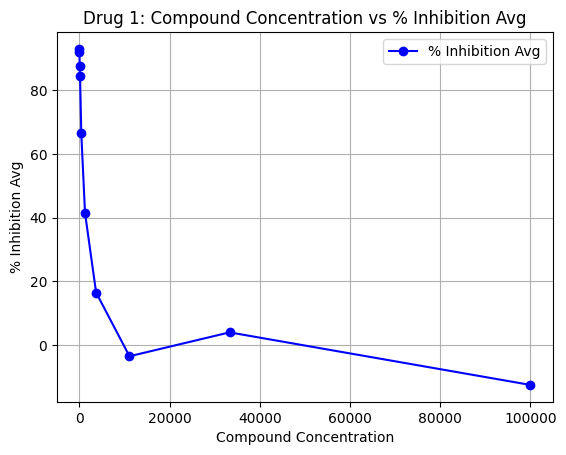

In [8]:
# Drug 1 데이터 필터링
df_drug1 = df_drugs[df_drugs['Compound Name'] == 'Drug 1']

# 플롯 그리기
df_drug1.plot(x='Compound Conc', y='% Inhibition Avg', kind='line', marker='o', linestyle='-', color='b', label='% Inhibition Avg')
plt.xlabel('Compound Concentration')
plt.ylabel('% Inhibition Avg')
plt.title('Drug 1: Compound Concentration vs % Inhibition Avg')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from py50.calculator import Calculator
from py50.plotcurve import PlotCurve
from py50.plot_settings import CBMARKERS, CBPALETTE

In [10]:
# Read in dataset
calc_data = Calculator(df_drugs)  # Instantiate dataframe into the Calculator class 
calc_data.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,-14.0,-11.0,-12.5
1,Drug 1,33300.0,11.0,-3.0,4.0
2,Drug 1,11100.0,-4.0,-3.0,-3.5
3,Drug 1,3700.0,22.0,11.0,16.5
5,Drug 1,1240.0,36.0,47.0,41.5


In [11]:
calculation = calc_data.calculate_absolute_ic50(name_col='Compound Name', concentration_col='Compound Conc',
                                                response_col='% Inhibition Avg')
calculation

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Drug 1,92.826614,-8.222595,1186.769319,879.983,-1.026795
1,Drug 2,92.173218,-11.380851,1205.751944,771.733,-0.841085
2,Drug 3,83.747565,1.904874,792.116084,553.191,-0.986817
3,Drug 4,97.469319,8.565238,948.090752,1114.062,-0.842892


In [12]:
calculation.to_csv("ic50_results.csv", index=False)

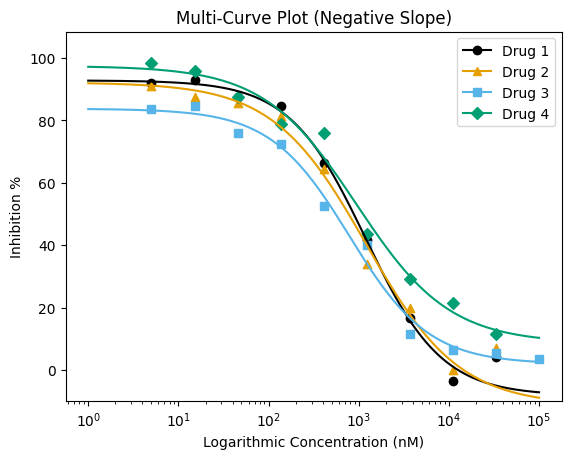

In [13]:
plot_data = PlotCurve(df_drugs)

figure = plot_data.multi_curve_plot(name_col='Compound Name',
                                    concentration_col='Compound Conc',
                                    response_col='% Inhibition Avg',
                                    plot_title='Multi-Curve Plot (Negative Slope)',
                                    xlabel='Logarithmic Concentration (nM)',
                                    ylabel='Inhibition %',
                                    legend=True,
                                    line_color=CBPALETTE,
                                    marker=CBMARKERS,
                                    ymin=-10)